In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('Advertising.csv')

In [3]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [8]:
df=df.iloc[:,1:]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [10]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


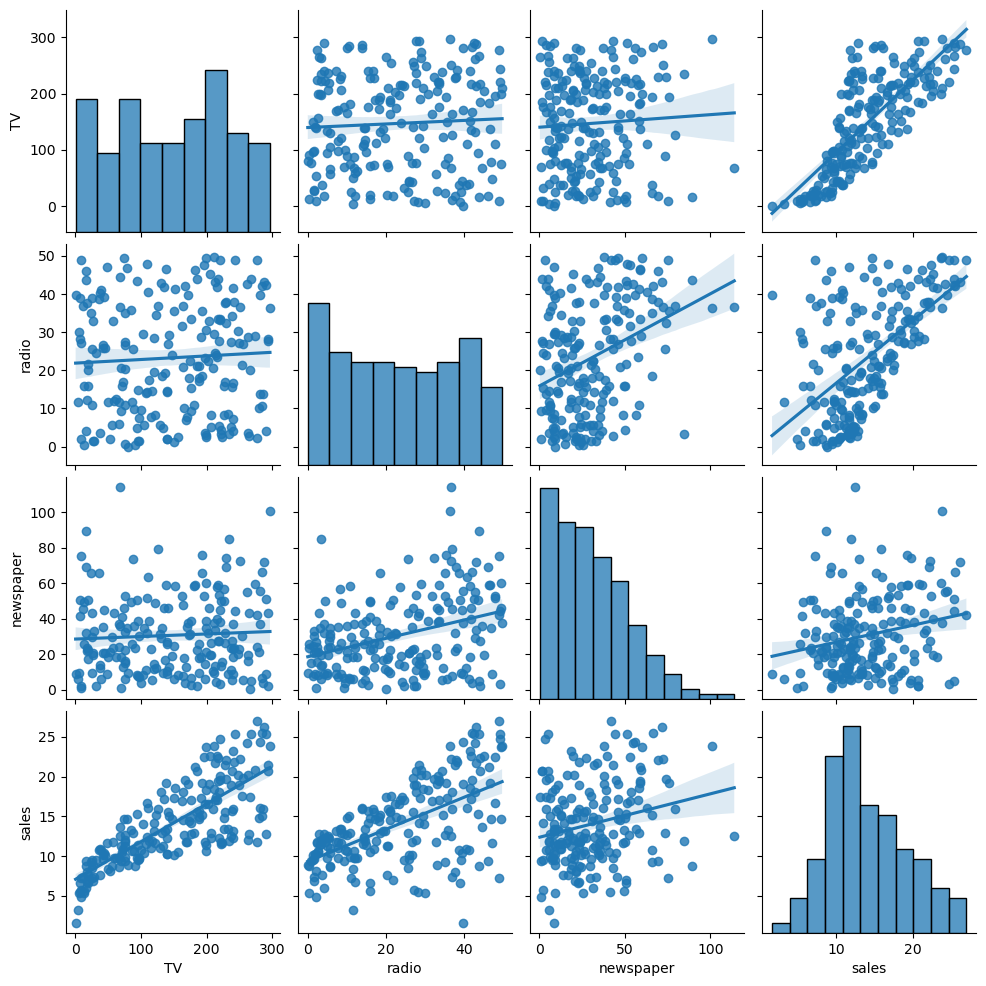

In [11]:
import seaborn as sns
sns.pairplot(df,kind = 'reg')

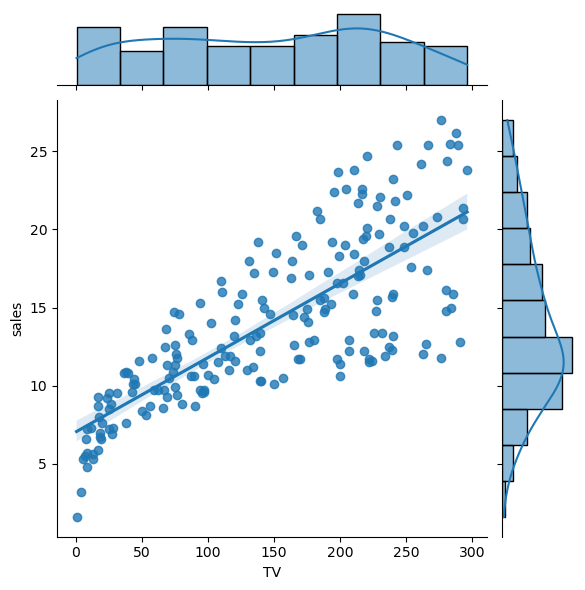

In [14]:
sns.jointplot(x= 'TV', y='sales', data=df, kind='reg')

## Statsmodels ile modelleme

In [19]:
import statsmodels.api as sm
X = df['TV']
X[0:5]

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [20]:
X= sm.add_constant(X)

In [21]:
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [22]:
y=df['sales']

In [23]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [24]:
lm = sm.OLS(y,X)

In [25]:
model = lm.fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 02 Sep 2023   Prob (F-statistic):           1.47e-42
Time:                        07:55:10   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
print('Sales=' + str('%2f'% model.params[0])+"+ TV"+ "*"+ str("%.2f"% model.params[1]))

Sales=7.032594+ TV*0.05


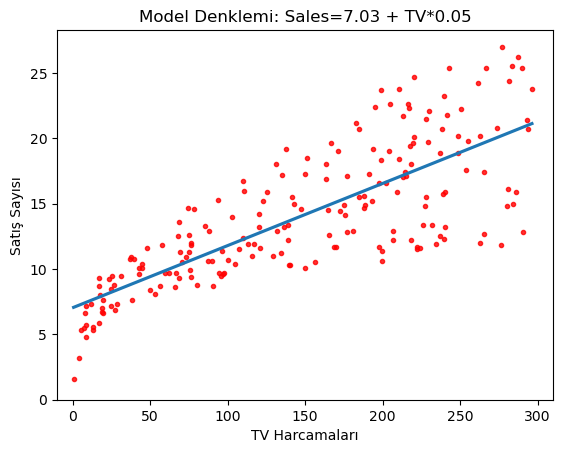

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already defined your DataFrame 'df'
g = sns.regplot(x='TV', y='sales', data=df, ci=None, scatter_kws={'color': 'r', 's': 9})
g.set_title('Model Denklemi: Sales=7.03 + TV*0.05')
g.set_ylabel('Satış Sayısı')
g.set_xlabel('TV Harcamaları')
plt.xlim(-10, 310)
plt.ylim(bottom=0)

plt.show()  # Display the plot


In [36]:
from sklearn.linear_model import LinearRegression

In [38]:
# Assuming you have already defined your DataFrame 'df'
X = df['TV'].values.reshape(-1, 1)  # Reshape X to be a 2D array
y = df['sales']

reg = LinearRegression()
model = reg.fit(X, y)

# Now, you can access model coefficients and intercept
model.intercept_
model.coef_


array([0.04753664])

In [39]:
model.score(X,y)

0.611875050850071

In [40]:
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

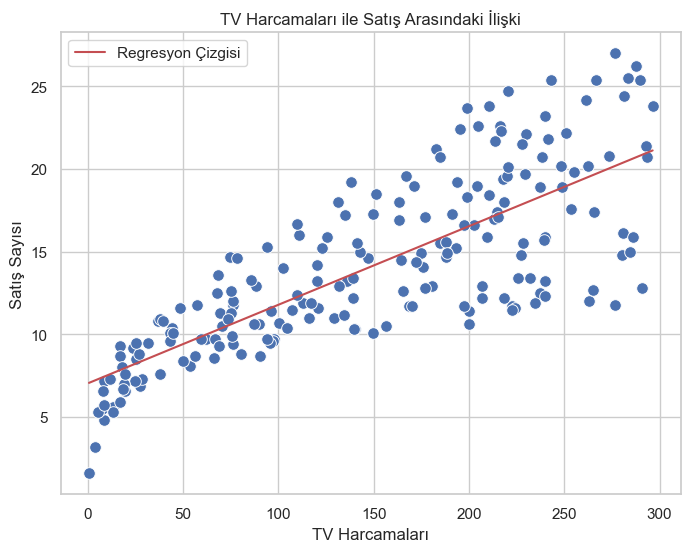

In [41]:


# Verileri düzgünce yeniden şekillendirelim
X = df['TV'].values.reshape(-1, 1)
y = df['sales']

# Lineer regresyon modelini oluşturup eğitelim
reg = LinearRegression()
model = reg.fit(X, y)

# Regresyon çizgisini ve verileri görselleştirelim
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))

# Veri noktalarını çizelim
sns.scatterplot(x='TV', y='sales', data=df, color='b', s=70)

# Regresyon çizgisini çizelim
sns.lineplot(x=df['TV'], y=model.predict(X), color='r', label='Regresyon Çizgisi')

plt.title('TV Harcamaları ile Satış Arasındaki İlişki')
plt.xlabel('TV Harcamaları')
plt.ylabel('Satış Sayısı')
plt.legend()
plt.show()


## Tahmin

Model Denklemii:

Sales = 7.03+TV*0.04

Örneğin 30 birim Tv harcaması olduğunda satışların tahmini değeri ne olur?

In [42]:
7.03 + 30*0.04

8.23

In [44]:
model.predict([[30]])

array([8.45869276])

## Artıklar(hatalar)

In [45]:
k_t = pd.DataFrame({"gercek_y": y[0:10],"tahmin_y":reg.predict(X)[0:10]})
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [47]:
k_t['hata']= k_t['gercek_y']- k_t['tahmin_y']
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [49]:
k_t['hata_kare']= k_t['hata']**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [52]:
np.sum(k_t['hata_kare'])

92.90350329638103

In [53]:
np.mean(k_t['hata_kare'])

9.290350329638104

In [56]:
np.sqrt(np.mean(k_t['hata_kare']))

3.0480075999967755